In [1]:
from utils import *
%load_ext autoreload
%autoreload 2

In [2]:
X_0 = np.loadtxt( "../../data/linear_vectorfield_data_x0.txt")
X_1 = np.loadtxt( "../../data/linear_vectorfield_data_x1.txt")


### Part 2.1：Estimate the linear vector field ###
- Given: datapoints x0, x1 in 2d </br>
- To show: using the inite differentce formulation to estimatetthe vectors $v^k$  at all points $x_0^k$

In [3]:
# Apply finite-difference formula
vector_field= (X_1 - X_0) / 0.1

# Estimate the vector field A with least-squares minimization
A,_,_,_=np.linalg.lstsq(X_0, vector_field, rcond=10e-6)

print(A.T)

[[-0.49355245  0.23191153]
 [-0.4638232  -0.95737573]]


<AxesSubplot: title={'center': 'stream plot for linear vector field of Ax'}>

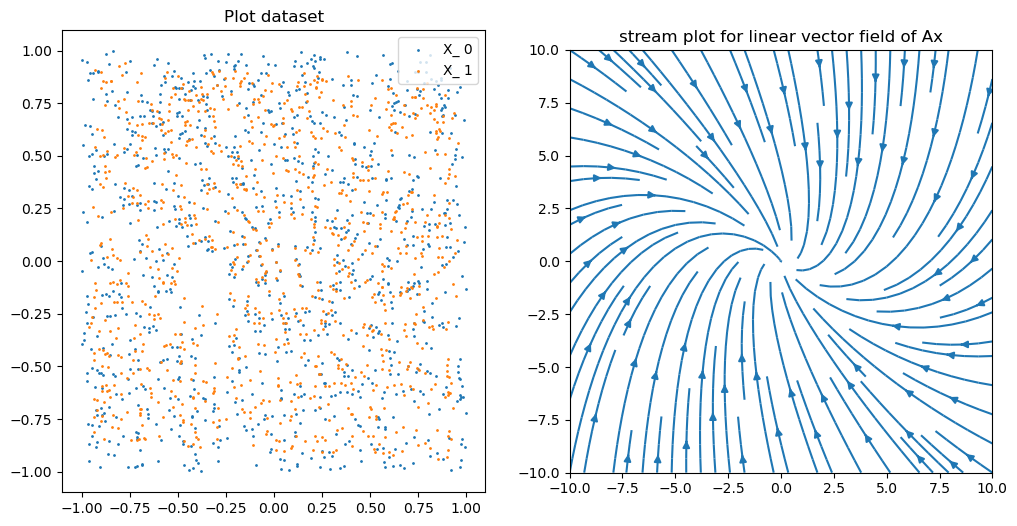

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_dataset(X_0, X_1, ax=ax1)
plot_phase_portrait_linear(10, A.T)

### Part 2.2：Slove the lienar system and Compute the MSE ###
- Given: All initial points $x_0^k$ , $T_{end}=0.1$ </br>
- To show: estimate points $x_1^k$ by $\dot{x}=\hat{A}x$, compute the mse to all the kown points $x_1^k$

In [5]:
#estimate points X_1^k
X1_pre = solve_ivp(X_0,  0.1, A)

#compute MSE
MSE= np.linalg.norm(X1_pre - X_1) **2 / len(X_0)
print(f"MSE = {MSE}")

MSE = 0.0030599275959897333


### Part 2.3： Visualize the trajectory as well as the phase portrait ###
- Given: the initial points (10,10) , $T_{end}=100$ </br>
- To show: visualize the trajectory as well as the phase portrait in a domain $[-10,10]^2$

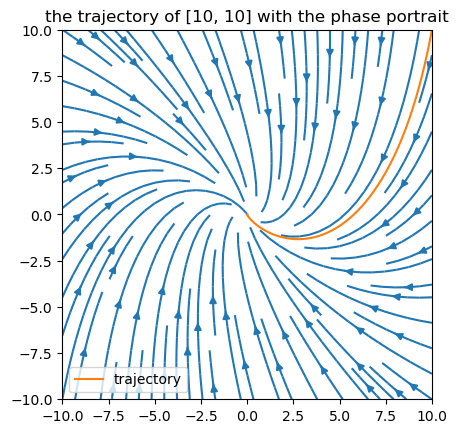

In [6]:
x0_point = [10, 10]
T_end=100

plot_trajectory_with_phase_portrait_linear(10, A.T, x0_point,T_end)
